In [192]:
import pandas as pd 


In [193]:
dataframe=pd.read_csv("bisiklet.csv")

In [194]:
dataframe.head()  # eğitimde bu dosyayı bulamadım -bende gemini den üretmesini istesim üretilen veride fiyat en başta olması gerekirken
#bende en sondaydı bunu düzeltemlim

,ozellik1,ozellik2,fiyat
0,1752.114587,1758.451236,954.8745
1,1755.987412,1751.235478,1205.4578
2,1750.145874,1759.854712,850.1245
3,1758.951235,1753.658741,1457.9854
4,1754.785412,1750.124578,987.4512


In [195]:
fiyat=dataframe["fiyat"] #fiyat kolonunu aldık 

In [196]:
fiyat

0      954.8745
1     1205.4578
2      850.1245
3     1457.9854
4      987.4512
        ...    
91     915.7741
92    1245.9985
93     842.1124
94    1475.5587
95     780.8899
Name: fiyat, Length: 96, dtype: float64

In [197]:
dataframe.drop("fiyat",axis=1,inplace=True ) # fiyat kolonunu sildik en sondan 

In [198]:
dataframe

,ozellik1,ozellik2
0,1752.114587,1758.451236
1,1755.987412,1751.235478
2,1750.145874,1759.854712
3,1758.951235,1753.658741
4,1754.785412,1750.124578
...,...,...
91,1756.552147,1753.220145
92,1751.336985,1757.889541
93,1758.112458,1750.445587
94,1754.998541,1755.111245


In [199]:
dataframe =pd.concat([fiyat,dataframe],axis=1) # fiyat kolonunu başa ekledik 

In [200]:
dataframe

,fiyat,ozellik1,ozellik2
0,954.8745,1752.114587,1758.451236
1,1205.4578,1755.987412,1751.235478
2,850.1245,1750.145874,1759.854712
3,1457.9854,1758.951235,1753.658741
4,987.4512,1754.785412,1750.124578
...,...,...,...
91,915.7741,1756.552147,1753.220145
92,1245.9985,1751.336985,1757.889541
93,842.1124,1758.112458,1750.445587
94,1475.5587,1754.998541,1755.111245


##### seaborn kütüphanesi ile  görselleştirme işlemleri 

In [201]:
import seaborn as sbn
import matplotlib.pyplot as plt

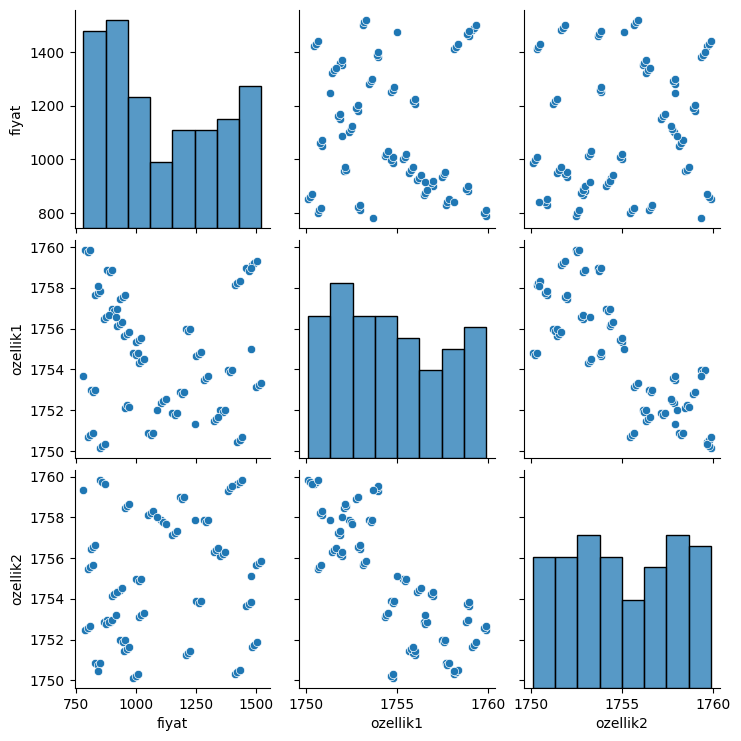

In [202]:
sbn.pairplot(dataframe)

### veriyi test/train olarak ikiye ayırma (istenen parça büyüklüğünde örn :  0.3 0.7 gibi)

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
### bizden diziler ister bu metod   

### train_test_split    y=wx + b formülünü unutmamalıyız 
y= label=ulaşılmak istenen sonuç
x=feature=özellik 

In [205]:

y=dataframe["fiyat"].values # .values ile numpy dizisi olarak aldık
x=dataframe[["ozellik1","ozellik2"]].values  #eğer .values olmasaydı dataframe 

In [206]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=15)





##### kaç tane veri olduğuna bakalım  .shape ile 

In [207]:
x_train.shape 

(64, 2)

In [208]:
x_test.shape

(32, 2)

In [209]:
y_train.shape

(64,)

In [210]:
y_test.shape

(32,)


## veri normalizasyonu
#### scaling 

In [211]:
 #  veri değerlerini 0 1 arasına alma işlemleri 

In [212]:
from sklearn.preprocessing import MinMaxScaler

In [213]:
scaler =MinMaxScaler()

In [214]:
scaler.fit(x_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [215]:
x_train=scaler.transform(x_train)

In [216]:
x_test=scaler.transform(x_test)

In [217]:
x_train  #veriler arasına getirildi

array([[0.79280029, 0.07704145],
       [0.89721069, 0.29410572],
       [0.98972107, 0.24997712],
       [0.3267368 , 0.58907612],
       [0.89481806, 0.37334109],
       [0.66936615, 0.28250339],
       [0.84068335, 0.04077187],
       [0.4988023 , 0.51228513],
       [0.36178888, 0.94590906],
       [0.6248258 , 0.44142265],
       [0.05263029, 1.        ],
       [0.16740658, 0.72938988],
       [0.18929443, 0.61638582],
       [0.47689492, 0.02054619],
       [0.17768551, 0.73966298],
       [0.28047482, 0.91049153],
       [0.47415342, 0.37496126],
       [0.        , 0.9995861 ],
       [0.13486174, 0.63661149],
       [0.47689492, 0.        ],
       [0.2384712 , 0.78379055],
       [0.65849639, 0.3180106 ],
       [0.58722166, 0.15751914],
       [0.88693176, 0.28383262],
       [0.28047482, 0.91049153],
       [0.44976327, 0.3287391 ],
       [0.24875013, 0.77351746],
       [0.06461727, 0.83212085],
       [0.7030314 , 0.41092388],
       [0.78252136, 0.06676835],
       [0.

#### tensorflow kullanımı 

In [218]:
import tensorflow as tf
from tensorflow.keras.models import Sequential #model için 
from tensorflow.keras.layers import Dense  #katmanlar için 

In [219]:

model=Sequential()

In [220]:
model.add(Dense(4,activation="relu")) #katmanların eklenmesi 4 nöronlu 
model.add(Dense(10,activation="relu"))
model.add(Dense(3,activation="relu"))

#3 katman

In [221]:
model.add(Dense(1))  #çıktı katmanı 

In [222]:
model.compile(optimizer ="adam",loss="mse") #modeli oluşturur / optimizer "adam" daha iyi çalışan bir yöntem olabilir 

#### Train etme işlemeleri

In [223]:
### eğer veri sayısı çok fazla ise tek seferde verilerin hepisni vermek yerine parça parça vermek gerekebilir   batch_size

In [224]:
model.fit(x_train,y_train,epochs=250, batch_size=2 )


Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1231417.5000
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1230803.8750
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1229752.5000
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1228061.0000
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1225567.8750
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1221720.1250
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1216071.8750
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1207703.1250 
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1195630.6250
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1178328.1250
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1154218.7500
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1121976.8750
Epoch 13/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1081238.7500
Epoch 14/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

In [225]:
loss=model.history.history["loss"]

In [226]:
#çizdirelim 

<Axes: >

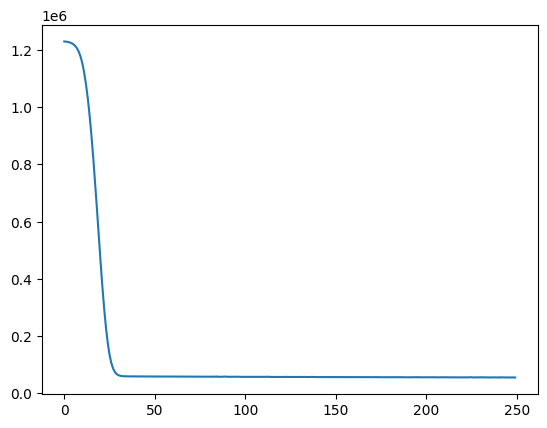

In [227]:
sbn.lineplot( x=range(len(loss)),y=loss )

In [228]:
trainLoss = model.evaluate(x_train,y_train,verbose=0)

In [229]:
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [230]:
trainLoss

52917.1328125

In [231]:
testLoss

56627.609375

#### model değerlendirilmesi 

In [232]:
#x_test  ve  y_test ile bir soru cevap datamız var
#  eğer sistemi x test ile eğitip y leri tahmin ettirirsek 
# ve y_test ler de zaten olması gereken edğerler
# tahmin edilen ile olması gereken i karşılaştırıp doğruluğu değerlendirebiliriz . 

In [233]:
testTahminleri=model.predict(x_test) # x test e göre eğitilecek ve sonuçta y değerlerini bulacak 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


In [234]:
testTahminleri  # bir dizi formunda 


array([[ 995.04565],
       [1100.0321 ],
       [1174.8242 ],
       [1124.6984 ],
       [1101.7931 ],
       [1098.1624 ],
       [1051.7672 ],
       [1162.535  ],
       [1132.7327 ],
       [1163.3673 ],
       [1254.2661 ],
       [1052.1616 ],
       [1143.5771 ],
       [ 995.10364],
       [1104.5957 ],
       [1066.7505 ],
       [ 974.22327],
       [1000.04065],
       [1106.677  ],
       [1166.1523 ],
       [1084.9718 ],
       [1002.6338 ],
       [1105.6924 ],
       [1106.3749 ],
       [1097.0206 ],
       [1090.377  ],
       [1132.2285 ],
       [1253.1245 ],
       [1179.8595 ],
       [1195.5618 ],
       [1057.307  ],
       [ 973.08484]], dtype=float32)

In [235]:
tahminDf=pd.DataFrame(y_test,columns=["Gerçek Y değerleri"])

In [236]:
tahminDf

,Gerçek Y değerleri
0,1410.3214
1,1500.3214
2,1477.9854
3,909.9987
4,1050.4578
5,820.9874
6,1360.1245
7,1430.6587
8,1085.3365
9,960.8745


In [237]:
testTahminleri=pd.Series(testTahminleri.reshape(32,)) ##serie stline çevirdik 

In [238]:
tahminDf=pd.concat([tahminDf,testTahminleri] , axis=1) ##tahmin ve gerçek değerleri birleştirerek  
# tahmin ve gerçek değerlerden oluşan bir tablo oluşturduk 

In [239]:
tahminDf

,Gerçek Y değerleri,0
0,1410.3214,995.045654
1,1500.3214,1100.032104
2,1477.9854,1174.824219
3,909.9987,1124.698364
4,1050.4578,1101.793091
5,820.9874,1098.162354
6,1360.1245,1051.767212
7,1430.6587,1162.535034
8,1085.3365,1132.732666
9,960.8745,1163.367310


In [240]:
tahminDf.columns=["Gerçek Y" , "Tahmin Y"]  #stun isimlerini değiştirdik 

In [241]:
tahminDf

,Gerçek Y,Tahmin Y
0,1410.3214,995.045654
1,1500.3214,1100.032104
2,1477.9854,1174.824219
3,909.9987,1124.698364
4,1050.4578,1101.793091
5,820.9874,1098.162354
6,1360.1245,1051.767212
7,1430.6587,1162.535034
8,1085.3365,1132.732666
9,960.8745,1163.367310


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

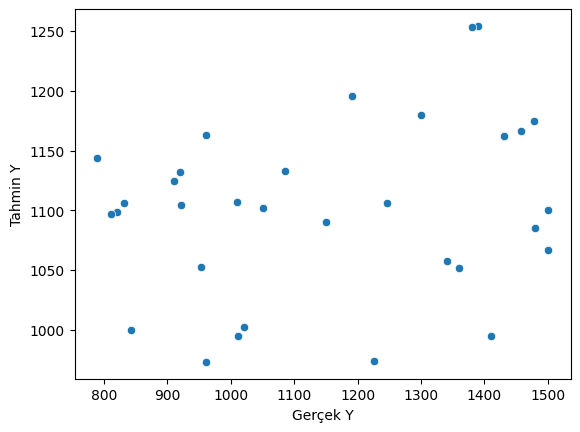

In [242]:
# çizdirelim 
sbn.scatterplot( x = "Gerçek Y",y = "Tahmin Y", data=tahminDf)

In [243]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [244]:
mean_absolute_error(tahminDf[ "Gerçek Y"],tahminDf["Tahmin Y"]) # hata oranı 

201.34791038208004

In [245]:
mean_squared_error(tahminDf[ "Gerçek Y"],tahminDf["Tahmin Y"]) # hata oranı 

56627.61487822875

### describe

In [246]:
# ilk datamızın özelliklerine bakalım 
dataframe.describe()  #datamızın özelliklerini verir 

,fiyat,ozellik1,ozellik2
count,96.000000,96.000000,96.000000
mean,1107.460159,1754.655027,1755.006145
std,232.233145,2.823902,2.968115
min,780.889900,1750.145874,1750.124578
25%,907.712550,1752.131087,1752.632896
50%,1040.655950,1754.590099,1754.937451
75%,1323.957800,1756.910412,1757.794415
max,1520.000000,1759.874512,1759.858741


#### modelin tahminleri 

In [247]:
yeniBisikletOzellikleri=[[1760,1758]] #bu özelliklerde bir bisiklet gelsin fiyat olarak ne diyecek sistemimiz 

In [248]:
yeniBisikletOzellikleri=scaler.transform(yeniBisikletOzellikleri) # normalize işlemleri yapalım 

In [249]:
model.predict(yeniBisikletOzellikleri) #sonuç üretsin bunun üzerine 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


array([[1387.8853]], dtype=float32)

## modeli kaydetmek 


In [257]:
from tensorflow.keras.models import load_model


In [258]:
model.save("bisiklet_modeli.h5")


In [ ]:
sonradanCagrilanmodel= load_model("bisiklet_modeli.h5")